## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.9, 0.95, 1]

### NESTEROV = TRUE

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mom in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "momentum-%s" % str(mom)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.900000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8423 - acc: 0.3430 - val_loss: 1.6962 - val_acc: 0.3964
Epoch 2/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6041 - acc: 0.4297 - val_loss: 1.5698 - val_acc: 0.4392
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5115 - acc: 0.4630 - val_loss: 1.5166 - val_acc: 0.4583
Epoch 4/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4579 - acc: 0.4816 - val_loss: 1.5611 - val_acc: 0.4496
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4077 - acc: 0.4974 - val_loss: 1.4307 - val_acc: 0.4947
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.3649 - acc: 0.5150 - val_loss: 1.5421 - val_acc: 0.4657
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3328 - acc: 0.5262 - val_loss: 1.4100 - val_acc

50000/50000 [==============================] - 3s 58us/step - loss: 1.6994 - acc: 0.3953 - val_loss: 1.7023 - val_acc: 0.3933
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6903 - acc: 0.4001 - val_loss: 1.7313 - val_acc: 0.3863
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7167 - acc: 0.3865 - val_loss: 1.7570 - val_acc: 0.3515
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7199 - acc: 0.3772 - val_loss: 1.8340 - val_acc: 0.3482
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.8274 - acc: 0.3395 - val_loss: 2.1454 - val_acc: 0.2937
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.0872 - acc: 0.2104 - val_loss: 2.1761 - val_acc: 0.1412
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.3476 - acc: 0.1038 - val_loss: 2.3895 - val_acc: 0.1000
Epoch 9/50
50000/50000 [============================

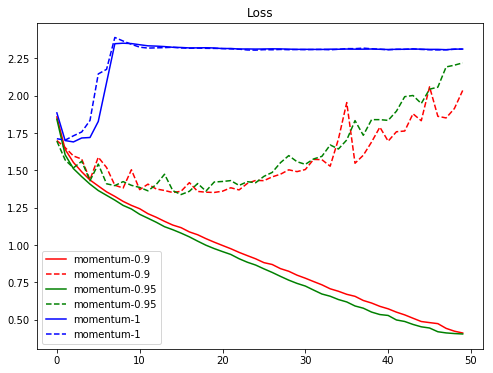

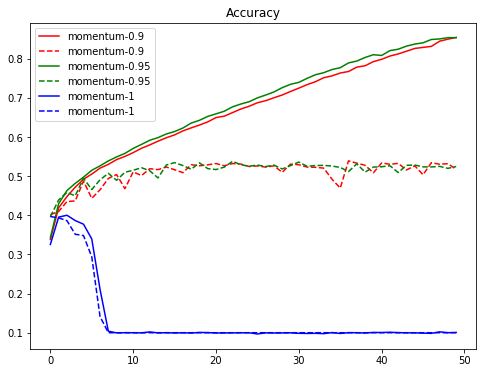

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### NESTEROV = FALSE

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mom in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "momentum-%s" % str(mom)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.900000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9035 - acc: 0.3118 - val_loss: 1.7554 - val_acc: 0.3720
Epoch 2/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6975 - acc: 0.3879 - val_loss: 1.6371 - val_acc: 0.4068
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6116 - acc: 0.4241 - val_loss: 1.5631 - val_acc: 0.4498
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5449 - acc: 0.4462 - val_loss: 1.5157 - val_acc: 0.4574
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4958 - acc: 0.4666 - val_loss: 1.4986 - val_acc: 0.4712
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4608 - acc: 0.4789 - val_loss: 1.5001 - val_acc: 0.4652
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4336 - acc: 0.4877 - val_loss: 1.4545 - val_acc

50000/50000 [==============================] - 3s 52us/step - loss: 1.8632 - acc: 0.3282 - val_loss: 1.8760 - val_acc: 0.3195
Epoch 3/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.9739 - acc: 0.2802 - val_loss: 2.0790 - val_acc: 0.2265
Epoch 4/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.1245 - acc: 0.2026 - val_loss: 2.1984 - val_acc: 0.1704
Epoch 5/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.3149 - acc: 0.1159 - val_loss: 2.3170 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.3401 - acc: 0.1015 - val_loss: 2.3245 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.3431 - acc: 0.0963 - val_loss: 2.3261 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.3453 - acc: 0.0988 - val_loss: 2.3422 - val_acc: 0.1000
Epoch 9/50
50000/50000 [============================

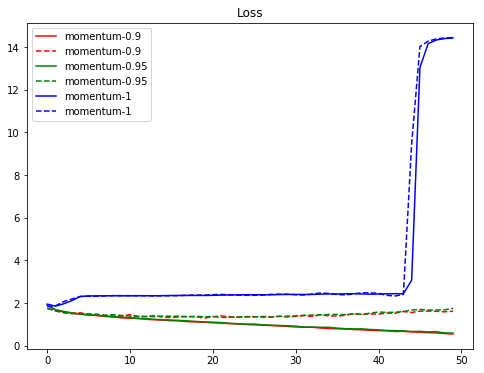

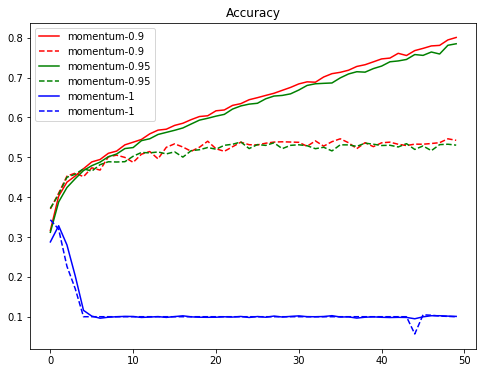

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()